In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shapley import ShapleyIndices, ShapleyKrigingIndices, SobolIndices, SobolKrigingIndices
from shapley.tests import Ishigami, AdditiveGaussian
from shapley.tests.utils import true_gaussian_full_ind_sobol
from shapley.plots import set_style_paper, plot_sensitivity_results
from shapley.plots import plot_error, plot_var

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

savefigs = True
ylim = [0, 1.0]

In [33]:
dim = 3
beta = None
model = AdditiveGaussian(dim=dim, beta=beta)
model.margins = [ot.Normal()]*(dim-1) + [ot.Normal(0, 2.)]

corr = 0.
theta = [0., 0., corr]
model.copula_parameters = theta

true_results = {
    'Shapley': model.shapley_indices,
    'First Sobol': model.first_order_sobol_indices,
    'Total Sobol': model.total_sobol_indices
}

In [34]:
Nv = 1000

n_No = 3
n_Ni = 20

min_Ni = 2
max_Ni = 100
min_No = 1
max_No = 10

n_boot = 1000
n_run = 100

all_Ni = np.linspace(min_Ni, max_Ni, n_Ni, dtype=int)
all_No = np.linspace(min_No, max_No, n_No, dtype=int)

In [35]:
ot.RandomGenerator.SetSeed(1)
np.random.seed(1)

all_shapley_results = np.zeros((n_No, n_Ni, n_run, dim, n_boot))
all_first_results = np.zeros((n_No, n_Ni, n_run, dim, n_boot))
all_total_results = np.zeros((n_No, n_Ni, n_run, dim, n_boot))

for i_No, No in enumerate(all_No):
    for i_Ni, Ni in enumerate(all_Ni):
        print('No:', No, 'Ni:', Ni)
        for i_run in range(n_run):
            shapley = ShapleyIndices(model.input_distribution)
            shapley.build_mc_sample(model=model, n_perms=None, Nv=Nv, No=No, Ni=Ni)
            shapley_results = shapley.compute_indices(n_boot=n_boot)
            all_shapley_results[i_No, i_Ni, i_run] = shapley_results.full_shapley_indices
            all_first_results[i_No, i_Ni, i_run] = shapley_results.full_first_indices
            all_total_results[i_No, i_Ni, i_run] = shapley_results.full_total_indices

No: 1 Ni: 2
No: 1 Ni: 7
No: 1 Ni: 12
No: 1 Ni: 17
No: 1 Ni: 22
No: 1 Ni: 27
No: 1 Ni: 32
No: 1 Ni: 38
No: 1 Ni: 43
No: 1 Ni: 48
No: 1 Ni: 53
No: 1 Ni: 58
No: 1 Ni: 63
No: 1 Ni: 69
No: 1 Ni: 74
No: 1 Ni: 79
No: 1 Ni: 84
No: 1 Ni: 89
No: 1 Ni: 94
No: 1 Ni: 100
No: 5 Ni: 2
No: 5 Ni: 7
No: 5 Ni: 12
No: 5 Ni: 17
No: 5 Ni: 22
No: 5 Ni: 27
No: 5 Ni: 32
No: 5 Ni: 38
No: 5 Ni: 43
No: 5 Ni: 48
No: 5 Ni: 53
No: 5 Ni: 58
No: 5 Ni: 63
No: 5 Ni: 69
No: 5 Ni: 74
No: 5 Ni: 79
No: 5 Ni: 84
No: 5 Ni: 89
No: 5 Ni: 94
No: 5 Ni: 100
No: 10 Ni: 2
No: 10 Ni: 7
No: 10 Ni: 12
No: 10 Ni: 17
No: 10 Ni: 22
No: 10 Ni: 27
No: 10 Ni: 32
No: 10 Ni: 38
No: 10 Ni: 43
No: 10 Ni: 48
No: 10 Ni: 53
No: 10 Ni: 58
No: 10 Ni: 63
No: 10 Ni: 69
No: 10 Ni: 74
No: 10 Ni: 79
No: 10 Ni: 84
No: 10 Ni: 89
No: 10 Ni: 94
No: 10 Ni: 100


[autoreload of shapley.tests.test_functions failed: Traceback (most recent call last):
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 369, in superreload
    module = reload(module)
  File "C:\Users\naz-probook\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\naz-probook\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "c:\users\naz-p

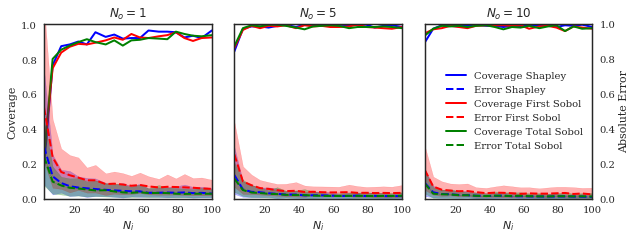

In [36]:
alpha = [2.75, 97.5]
legend = False
fig, axes = plt.subplots(1, n_No, figsize=(9, 3.5), sharex=True, sharey=True)
for i_No, No in enumerate(all_No):
    results = {
        'Shapley': all_shapley_results[i_No],
        'First Sobol': all_first_results[i_No],
        'Total Sobol': all_total_results[i_No]
    }
    if i_No == n_No-1:
        legend = True
        
    ax = axes[i_No]
    ax, ax2 = plot_error(results, all_Ni, true_results, ax=ax, ylim=[0., None], alpha=alpha, loc=5, logscale=False, legend=legend)
    if i_No < n_No-1:
        ax2.set_ylabel('')
        ax2.set_yticks([])
    if i_No > 0:
        ax.set_ylabel('')
    ax.set_title('$N_o = %d$' % (No))
    
fig.tight_layout()
if savefigs:
    fig.savefig('./output/gaussian_precision_nNo_%d_rho_%.2f_Nv_%d_maxNo_%d_maxNi_%d_nrun%d.pdf' % (n_No, corr, Nv, max_No, max_Ni, n_run))

[autoreload of shapley.tests.test_functions failed: Traceback (most recent call last):
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 369, in superreload
    module = reload(module)
  File "C:\Users\naz-probook\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\naz-probook\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "c:\users\naz-p

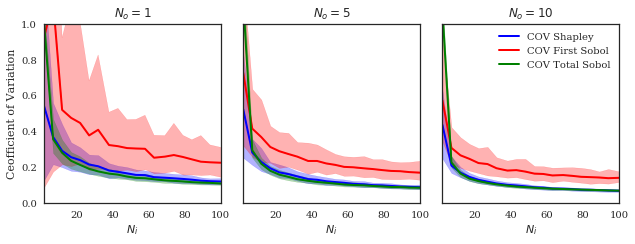

In [37]:
alpha = [2.75, 97.5]
legend = False
fig, axes = plt.subplots(1, n_No, figsize=(9, 3.5), sharex=True, sharey=True)
for i_No, No in enumerate(all_No):
    results = {
        'Shapley': all_shapley_results[i_No],
        'First Sobol': all_first_results[i_No],
        'Total Sobol': all_total_results[i_No]
    }
    if i_No == n_No-1:
        legend = True
        
    ax = axes[i_No]
    ax = plot_var(results, all_Ni, ax=ax, ylim=[0, 1], alpha=alpha, loc=0, logscale=False, legend=legend)
    
    if i_No > 0:
        ax.set_ylabel('')
    fig.tight_layout()
    ax.set_title('$N_o = %d$' % (No))
    if savefigs:
        fig.savefig('./output/var_gaussian_precision_nNo_%d_rho_%.2f_Nv_%d_maxNo_%d_maxNi_%d_nrun%d.pdf' % (n_No, corr, Nv, max_No, max_Ni, n_run))